In [5]:
import numpy as np 
import pandas as pd 

import  matplotlib.pyplot as  plt

## 📌 Justification for Using Polynomial Regression

Given a dataset:

\[
\begin{array}{|c|c|}
\hline
x & y \\
\hline
1 & 2 \\
2 & 5 \\
3 & 10 \\
4 & 17 \\
5 & 26 \\
6 & 37 \\
7 & 50 \\
8 & 65 \\
9 & 82 \\
10 & 101 \\
\hline
\end{array}
\]

### 🔍 Observations:
The output \( y \) increases at an accelerating rate as \( x \) increases, which indicates a **non-linear** relationship.  
For example:
- \( x: 1 \rightarrow 2 \Rightarrow \Delta y = 3 \)
- \( x: 9 \rightarrow 10 \Rightarrow \Delta y = 19 \)

This kind of growth cannot be captured by a linear model:

\[
y = \beta_0 + \beta_1 x
\]

### ✅ Why Polynomial Regression?

To capture the curvature in the data, we use **Polynomial Regression**:

\[
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_n x^n
\]

This allows the model to fit more complex patterns (such as quadratic, cubic curves).

---

### 🎯 Learning Objective

The purpose of applying Polynomial Regression here is to:

- Understand the **limitations of simple linear models**.
- Visualize how polynomial terms (e.g., \( x^2, x^3 \)) improve the fit.
- Learn to choose an appropriate **degree \( n \)** of the polynomial to balance:
  - **Underfitting** (too simple),
  - **Overfitting** (too complex).

By plotting both linear and polynomial models, we develop a clear understanding of when and why polynomial regression is necessary.

---


x shape =  (10,)
y shape =  (10,)


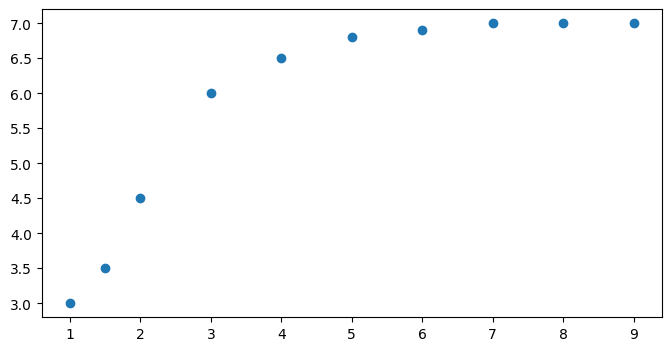

In [77]:
#create dataset
x = np.array([1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([3, 3.5, 4.5, 6, 6.5, 6.8, 6.9, 7, 7, 7])
print ("x shape = ",x.shape)
print ("y shape = ",y.shape)

#plot the data points
plt.figure(figsize=(8, 4))
plt.scatter(x,y)
plt.show()

In [84]:
x=x.reshape(-1,1)
x.shape


(10, 1)

In [123]:
class LinearRegrssion:
    def __init__(self,iteration,lr):
        self.iteration=iteration
        self.lr =lr
        
    def scaled(self,x):
        mean =x.mean()
        scaled=(x-mean)/np.std(x)
        return scaled

        
        
    def fit(self , x , y):
        self.thetai=np.random.rand(x.shape[1])
        self.theta0=.2
        self.m_sample=x.shape[0]
        self.losses=[]
        
        
        for i in range(self.iteration):
            h_x =self.theta0+np.dot(self.thetai,x.T)
            cost=(1/self.m_sample )*np.sum((h_x-y)**2)
            self.losses.append(cost)
            
            theta0_d= (2/self.m_sample )*np.sum(h_x-y)
            thetai_d=(2/self.m_sample )*np.dot(x.T,(h_x-y))
            
            self.theta0 -= self.lr *theta0_d
            self.thetai -= self.lr *thetai_d
            
        def predict(self,x):
            self.scaled(x)
            pred =self.theta0+np.dot(self.thetai,x.T)
            return pred
            

In [124]:
obj = LinearRegrssion(iteration=10000 , lr=0.01)
obj.scaled(x)
obj.fit(x,y)
obj.losses

[13.102936223348193,
 4.883491263448628,
 3.4783837150043917,
 3.2207475536296055,
 3.1565030684373863,
 3.125018748381752,
 3.099248625481772,
 3.0746373108848637,
 3.050415964591813,
 3.0264532709429375,
 3.002725266352762,
 2.9792260789431597,
 2.9559529004307206,
 2.9329034558128475,
 2.9100755771940983,
 2.887467131868754,
 2.8650760100478236,
 2.8429001226294166,
 2.8209374006615953,
 2.799185795091728,
 2.777643276565616,
 2.7563078352365324,
 2.7351774805774296,
 2.7142502411951877,
 2.6935241646466825,
 2.6729973172566237,
 2.6526677839371504,
 2.6325336680091627,
 2.6125930910253654,
 2.5928441925950123,
 2.5732851302103423,
 2.553914079074681,
 2.534729231932183,
 2.515728798899234,
 2.49691100729745,
 2.4782741014882976,
 2.4598163427093,
 2.441536008911809,
 2.4234313946003505,
 2.4055008106735065,
 2.3877425842663222,
 2.370155058594239,
 2.3527365927985207,
 2.3354855617931616,
 2.3184003561132807,
 2.3014793817649557,
 2.2847210600765098,
 2.268123827551232,
 2.25168613

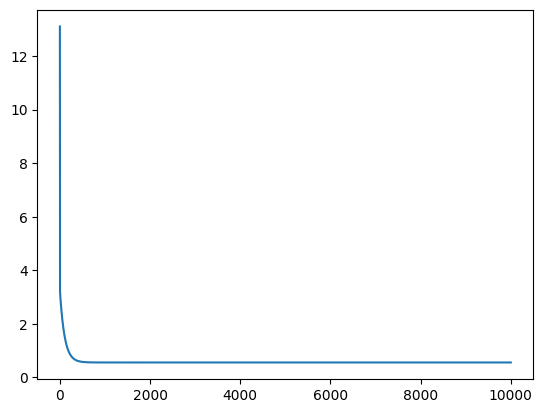

In [125]:
plt.plot(obj.losses)

In [126]:
x_line =np.linspace(min(x),max(x),10)

In [127]:
g=obj.theta0 +obj.thetai*x_line

In [128]:
print(obj.theta0 ,obj.thetai)

3.5927138331572945 [0.47898627]


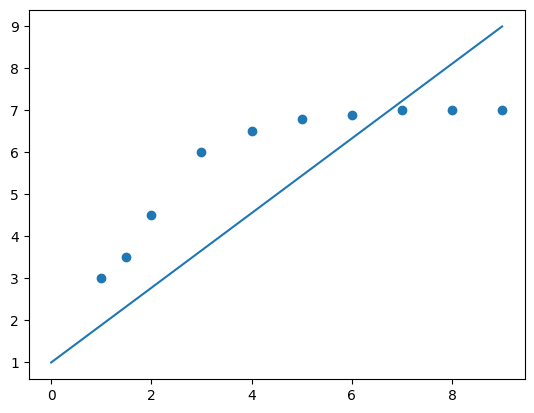

In [129]:
plt.plot(x_line)
plt.scatter(x,y)